In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size =10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
x[[3,7,4]]

array([71, 86, 60])

In [4]:
ind = np.array([[3,7],[4,5]])
ind

array([[3, 7],
       [4, 5]])

In [5]:
x[ind]

array([[71, 86],
       [60, 20]])

In [6]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
row = np.array((0,1,2))
col = np.array((2,1,3))
X[row, col]

array([ 2,  5, 11])

In [11]:
row[:, np.newaxis], col

(array([[0],
        [1],
        [2]]), array([2, 1, 3]))

In [12]:
X[ row[:, np.newaxis], col, ]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [13]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
X[2, [2,0,1]]

array([10,  8,  9])

In [15]:
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [17]:
mask = np.array([1,0,1,0], dtype=bool)
X[row[:,np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [19]:
mean = [0, 0]
cov = [[1,2],[2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

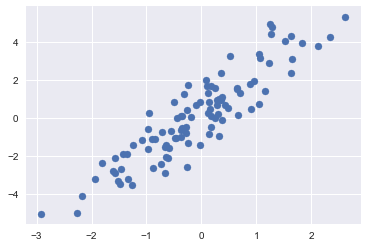

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

plt.scatter(X[:,0],X[:,1])

In [22]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([95, 59, 68, 86, 51, 29, 46,  0, 94, 99, 33, 74,  8, 36, 55, 28, 24,
       96, 97, 32])

In [23]:
selection = X[indices,:]
selection.shape

(20, 2)

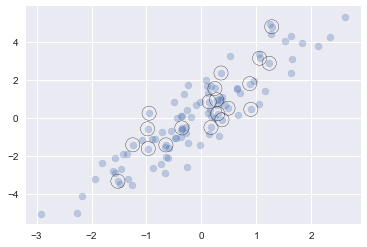

In [30]:
plt.scatter(X[:,0], X[:,1], alpha = 0.3)
plt.scatter(selection[:,0], selection[:,1],
            facecolor = 'none', s = 200,
            edgecolors = 'black')

In [29]:
plt.scatter?

In [31]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [32]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [33]:
x = np.zeros(10)
x[[0,0]] = [4,6]
x

array([ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [34]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

In [35]:
x = np.zeros(10)
np.add.at(x,i,1)
x

array([ 0.,  0.,  1.,  2.,  3.,  0.,  0.,  0.,  0.,  0.])

In [46]:
np.random.seed(42)
x = np.random.randn(100)

bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)
counts

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [47]:
i = np.searchsorted(bins,x)
i

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10])

In [48]:
np.add.at(counts,i,1)
counts

array([  0.,   0.,   0.,   0.,   0.,   1.,   3.,   7.,   9.,  23.,  22.,
        17.,  10.,   7.,   1.,   0.,   0.,   0.,   0.,   0.])

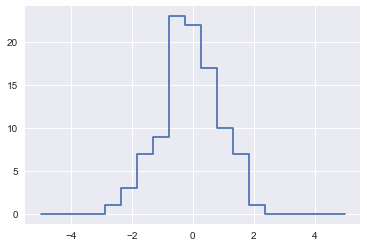

In [49]:
plt.plot(bins,counts, linestyle = 'steps');

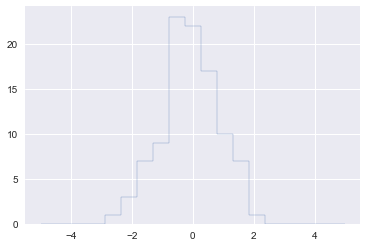

In [52]:
plt.hist(x,bins,histtype = 'step');

In [53]:
%timeit counts, edges = np.histogram(x,bins)
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

73.9 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
15.3 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [54]:
x = np.random.randn(1000000)

%timeit counts, edges = np.histogram(x,bins)
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

70.5 ms ± 2.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
108 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x


In [58]:
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [59]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

x = np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [60]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [61]:
x.sort()
x

array([1, 2, 3, 4, 5])

In [62]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

In [63]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [64]:
np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [65]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [66]:
np.partition(X, 2, axis = 1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [67]:
X = rand.rand(10,2)
X

array([[ 0.00706631,  0.02306243],
       [ 0.52477466,  0.39986097],
       [ 0.04666566,  0.97375552],
       [ 0.23277134,  0.09060643],
       [ 0.61838601,  0.38246199],
       [ 0.98323089,  0.46676289],
       [ 0.85994041,  0.68030754],
       [ 0.45049925,  0.01326496],
       [ 0.94220176,  0.56328822],
       [ 0.3854165 ,  0.01596625]])

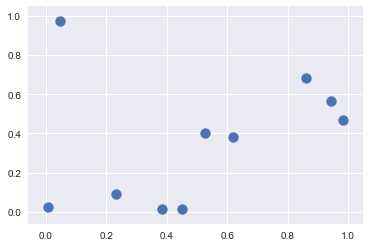

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

plt.scatter(X[:,0], X[:, 1], s = 100);

In [82]:
np.arange(4).reshape((1,4)) + np.arange(4).reshape((4,1))

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

In [84]:
np.arange(4).reshape((1,4)) 

array([[0, 1, 2, 3]])

In [ ]:
np.arange(4).reshape((4,1))

In [83]:
X[:,0,np.newaxis]

array([[ 0.00706631],
       [ 0.52477466],
       [ 0.04666566],
       [ 0.23277134],
       [ 0.61838601],
       [ 0.98323089],
       [ 0.85994041],
       [ 0.45049925],
       [ 0.94220176],
       [ 0.3854165 ]])

In [85]:
X[np.newaxis,:,0]

array([[ 0.00706631,  0.52477466,  0.04666566,  0.23277134,  0.61838601,
         0.98323089,  0.85994041,  0.45049925,  0.94220176,  0.3854165 ]])

In [101]:
((X[np.newaxis,:,0] - X[:,0,np.newaxis]) ** 2) + ((X[np.newaxis,:,1] - X[:,1,np.newaxis]) ** 2)


array([[ 0.        ,  0.40999909,  0.90538547,  0.05550496,  0.50287983,
         1.14976739,  1.15936537,  0.19672877,  1.16632222,  0.14319923],
       [ 0.40999909,  0.        ,  0.55794316,  0.18090431,  0.00906581,
         0.21465798,  0.19098635,  0.15497331,  0.20095384,  0.16679585],
       [ 0.90538547,  0.55794316,  0.        ,  0.81458763,  0.67649219,
         1.13419594,  0.74752753,  1.08562368,  0.9704683 ,  1.03211241],
       [ 0.05550496,  0.18090431,  0.81458763,  0.        ,  0.23387834,
         0.70468321,  0.74108843,  0.05338715,  0.72671958,  0.0288717 ],
       [ 0.50287983,  0.00906581,  0.67649219,  0.23387834,  0.        ,
         0.14021843,  0.1470605 ,  0.16449241,  0.13755476,  0.18859392],
       [ 1.14976739,  0.21465798,  1.13419594,  0.70468321,  0.14021843,
         0.        ,  0.06080186,  0.48946337,  0.01100053,  0.56059965],
       [ 1.15936537,  0.19098635,  0.74752753,  0.74108843,  0.1470605 ,
         0.06080186,  0.        ,  0.61258786

In [100]:
np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

array([[ 0.        ,  0.40999909,  0.90538547,  0.05550496,  0.50287983,
         1.14976739,  1.15936537,  0.19672877,  1.16632222,  0.14319923],
       [ 0.40999909,  0.        ,  0.55794316,  0.18090431,  0.00906581,
         0.21465798,  0.19098635,  0.15497331,  0.20095384,  0.16679585],
       [ 0.90538547,  0.55794316,  0.        ,  0.81458763,  0.67649219,
         1.13419594,  0.74752753,  1.08562368,  0.9704683 ,  1.03211241],
       [ 0.05550496,  0.18090431,  0.81458763,  0.        ,  0.23387834,
         0.70468321,  0.74108843,  0.05338715,  0.72671958,  0.0288717 ],
       [ 0.50287983,  0.00906581,  0.67649219,  0.23387834,  0.        ,
         0.14021843,  0.1470605 ,  0.16449241,  0.13755476,  0.18859392],
       [ 1.14976739,  0.21465798,  1.13419594,  0.70468321,  0.14021843,
         0.        ,  0.06080186,  0.48946337,  0.01100053,  0.56059965],
       [ 1.15936537,  0.19098635,  0.74752753,  0.74108843,  0.1470605 ,
         0.06080186,  0.        ,  0.61258786

In [109]:
X[:, np.newaxis, :].shape

(10, 1, 2)

In [110]:
X[ np.newaxis, :, :].shape

(1, 10, 2)

In [111]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [113]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [116]:
dist_sq = sq_differences.sum(axis=-1)
dist_sq.shape

(10, 10)

In [117]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [119]:
nearest = np.argsort(dist_sq, axis = 1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]])

In [121]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)
nearest_partition

array([[3, 0, 9, 7, 1, 4, 2, 5, 8, 6],
       [1, 4, 7, 9, 3, 5, 6, 2, 8, 0],
       [2, 1, 4, 6, 3, 0, 5, 7, 8, 9],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4],
       [1, 8, 4, 5, 7, 6, 9, 3, 2, 0],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 5, 6, 2, 8, 0],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4]])

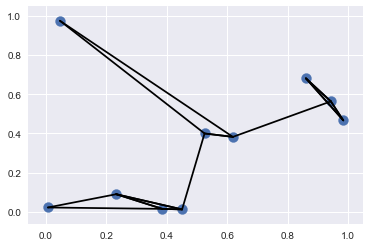

In [122]:
plt.scatter(X[:,0], X[:,1], s = 100)
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color = 'black')

In [124]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight  = [55.0, 85.5, 68.0, 61.5]

In [125]:
x = np.zeros(4, dtype = int)

In [128]:
data = np.zeros(4, dtype = {'names':('name','age','weight'),
                           'formats':('U10','i4','f8')})
data

array([('', 0,  0.), ('', 0,  0.), ('', 0,  0.), ('', 0,  0.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [130]:
data['name'] = name
data['age'] = age
data['weight'] = weight
data

array([('Alice', 25,  55. ), ('Bob', 45,  85.5), ('Cathy', 37,  68. ),
       ('Doug', 19,  61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [131]:
print(data)

[('Alice', 25,  55. ) ('Bob', 45,  85.5) ('Cathy', 37,  68. )
 ('Doug', 19,  61.5)]


In [132]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'],
      dtype='<U10')

In [133]:
data[0]

('Alice', 25,  55.)

In [134]:
data[-1]['name']

'Doug'

In [136]:
data[data['age'] < 30]['name']

array(['Alice', 'Doug'],
      dtype='<U10')

In [137]:
np.dtype({'names':('name','age','weight'),
         'formats':('U10','i4','f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [138]:
np.dtype({'names':('name','age','weight'),
         'formats':((np.str_,10),int,np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [139]:
np.dtype([('name','S10'),('age','i4'),('weight','f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [140]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

In [142]:
tp = np.dtype([('id','i8'),('mat','f8',(3,3))])
tp

dtype([('id', '<i8'), ('mat', '<f8', (3, 3))])

In [146]:
X = np.zeros(1, dtype=tp)
X[0]['mat']

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [147]:
data['age']

array([25, 45, 37, 19], dtype=int32)

In [151]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

In [152]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

182 ns ± 4.04 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
4.02 µs ± 92.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.36 µs ± 91.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
